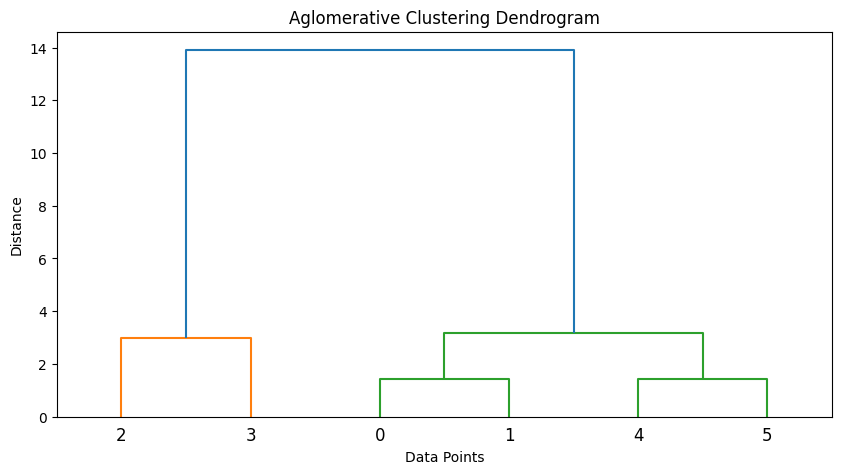

Cluster assignments: [2 2 1 1 2 2]


In [8]:
# Importar las librerías necesarias
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Datos de ejemplo
data = np.array([[1, 2], [2, 3], [5, 8], [8, 8], [1, 0], [0, 1]])

# Realizar clustering aglomerativo usando el método 'ward'
z = linkage(data, method='ward')

# Crear y mostrar el dendrograma
plt.figure(figsize=(10,5))
dendrogram(z)
plt.title('Aglomerative Clustering Dendrogram') # Título del dendrograma
plt.xlabel('Data Points') # Etiqueta del eje x
plt.ylabel('Distance') # Etiqueta del eje y
plt.show()

# Asignar los puntos de datos a clusters basándose en el número máximo de clusters (2 en este caso)
clusters = fcluster(z, t=2, criterion='maxclust')
# Imprimir las asignaciones de cluster
print("Cluster assignments:", clusters)


fcluster: es la agrupacion de todos los datos

pasar los cluster a una nueva columna y en base a eso de agrupan y luego saco el promedio

El punto de corte:

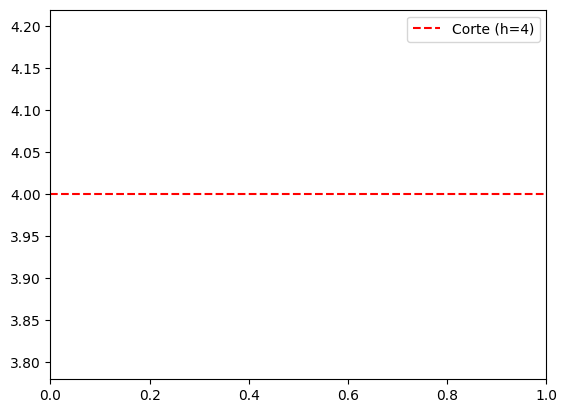

In [9]:
# Definir el punto de corte (umbral)
h = 4 # Ajustar el valor segun su necesidad

# Añadir una línea horizontal al dendrograma para mostrar el punto de corte
plt.axhline(y=h, color='r', linestyle='--', label = f'Corte (h={h})')
# Mostrar la leyenda
plt.legend()
# Mostrar la gráfica con la línea de corte
plt.show()


columa de caracteristia 1 y caracteristica 2 y el cluster

In [32]:
# Importar las librerías necesarias (numpy y pandas ya importadas, pero se incluyen por completitud)
import numpy as np
import pandas as pd
# Importar funciones para clustering jerárquico (ya importadas, pero se incluyen por completitud)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# Importar matplotlib para graficar (ya importado, pero se incluye por completitud)
import matplotlib.pyplot as plt

# Datos de los clusters (se repite la definición, pero se usa la variable 'cluster')
cluster = np.array([[1, 2], [2, 3], [5, 8], [8, 8], [1, 0], [0, 1]])
# Crear un DataFrame de pandas con los datos y nombres de columna
df = pd.DataFrame(cluster, columns=['Feature1', 'Feature2'])
# Añadir una nueva columna al DataFrame con las asignaciones de cluster obtenidas previamente
df['cluster'] = clusters
# Mostrar el DataFrame
df


,Feature1,Feature2,cluster
0,1,2,2
1,2,3,2
2,5,8,1
3,8,8,1
4,1,0,2
5,0,1,2


In [11]:
# Agrupar el DataFrame por la columna 'cluster' y calcular el promedio de las características para cada grupo
df.groupby('cluster').mean()

,Feature1,Feature2
cluster,,
1,6.5,8.0
2,1.0,1.5


In [12]:
# Filtrar el DataFrame para mostrar solo las filas donde la columna 'cluster' es igual a 2
df[df['cluster'] == 2]

,Feature1,Feature2,cluster
0,1,2,2
1,2,3,2
4,1,0,2
5,0,1,2


In [13]:
# Agrupar el DataFrame por 'cluster', calcular la media y transponer el resultado
group = df.groupby('cluster').mean().T

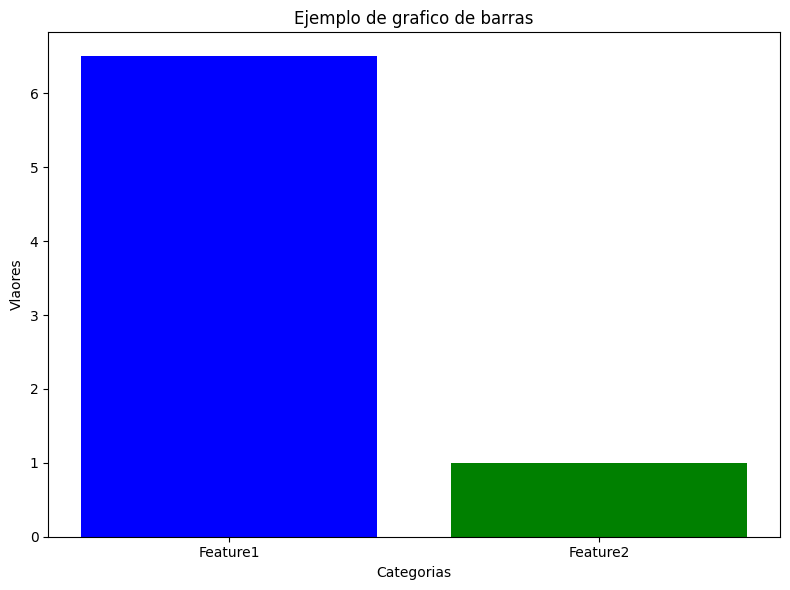

In [14]:
# Obtener las categorías (nombres de características) del índice del DataFrame transpuesto
categorias = group.index
# Obtener los valores de la primera fila (promedios del cluster 1)
valores = group.values[0] #cluster1
# Definir los colores para las barras
colores =['blue', 'green']

# Crear una nueva figura para el gráfico de barras
plt.figure(figsize=(8,6))
# Crear el gráfico de barras
plt.bar(categorias, valores, color = colores)

# Añadir titulo y etiquetas a los ejes
plt.title('Ejemplo de grafico de barras') # Título del gráfico
plt.xlabel('Categorias') # Etiqueta del eje x
plt.ylabel('Vlaores') # Etiqueta del eje y

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()
# Mostrar el gráfico
plt.show()


In [30]:
# Identificar cómo obtener los puntos de datos (personas) que pertenecen a este grupo
# que tienen ciertas características (Feature 1 y Feature 2)

# ACTIVIDAD / TAREA PENDIENTE: Implementar la lógica para identificar los miembros de un grupo específico.

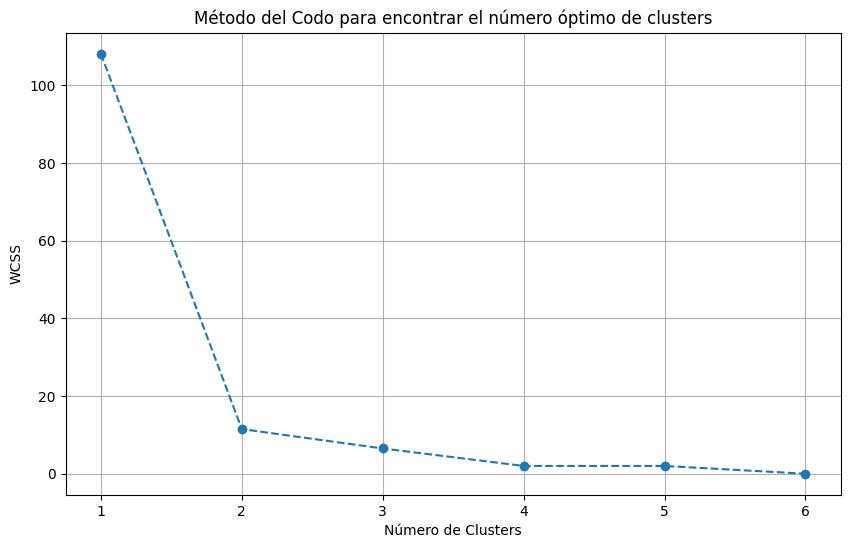

In [31]:
# Importar las librerías necesarias para el método del codo
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Recalcular la matriz de enlace (linkage matrix)
z = linkage(data, method='ward')

# Calcular la suma de cuadrados dentro de los clusters (WCSS) para un rango de números de clusters
wcss = []
max_clusters = data.shape[0] # El número máximo de clusters es igual al número de puntos de datos
for i in range(1, max_clusters + 1):
    # Asignar los puntos de datos a 'i' clusters
    clusters_i = fcluster(z, t=i, criterion='maxclust')
    current_wcss = 0
    # Calcular la WCSS para la configuración actual de clusters
    for cluster_id in np.unique(clusters_i):
        # Seleccionar los puntos de datos que pertenecen al cluster actual
        cluster_points = data[clusters_i == cluster_id]
        # Calcular el centroide (media) de los puntos en el cluster
        centroid = np.mean(cluster_points, axis=0)
        # Calcular la suma de cuadrados de las distancias de los puntos al centroide
        current_wcss += np.sum((cluster_points - centroid) ** 2)
    # Añadir la WCSS calculada a la lista
    wcss.append(current_wcss)

# Graficar el Método del Codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para encontrar el número óptimo de clusters') # Título del gráfico
plt.xlabel('Número de Clusters') # Etiqueta del eje x
plt.ylabel('WCSS') # Etiqueta del eje y
plt.xticks(range(1, max_clusters + 1)) # Asegurar que los ticks del eje x sean números enteros
plt.grid(True) # Mostrar cuadrícula
plt.show() # Mostrar el gráfico

### Método de la Silueta
El método de la silueta es otra técnica para validar la consistencia interna de los clusters. Un valor alto de coeficiente de silueta indica que el objeto está bien agrupado y separado de otros clusters.

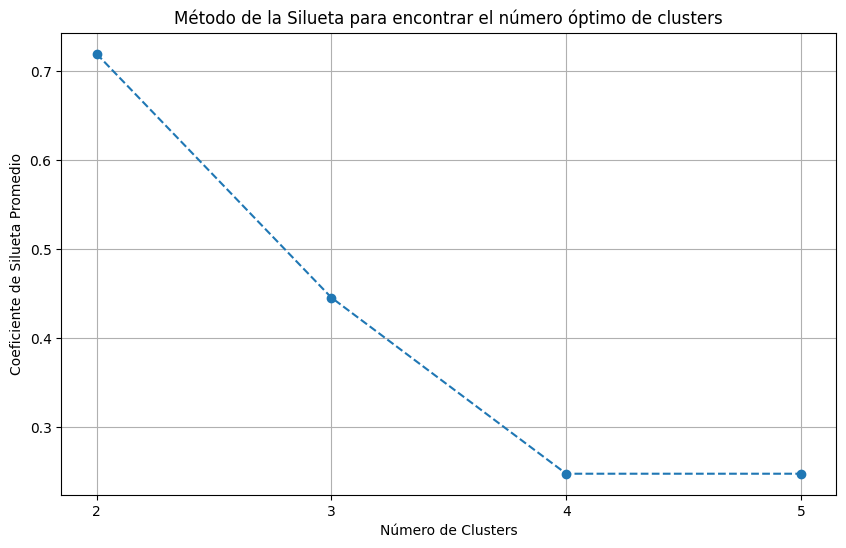

El número óptimo de clusters según el Método de la Silueta es: 2


In [34]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Calcular los coeficientes de silueta para diferentes números de clusters
silhouette_scores = []
# Empezamos desde 2 clusters, ya que el coeficiente de silueta no está definido para 1 cluster
# Iteramos hasta max_clusters - 1 para evitar el caso donde cada punto es un cluster
for n_clusters in range(2, max_clusters):
    # Asignar los puntos de datos a 'n_clusters'
    clusters_n = fcluster(z, t=n_clusters, criterion='maxclust')
    # Calcular el coeficiente de silueta promedio
    # Asegurarse de que haya más de un cluster para calcular el silhouette_score
    if len(np.unique(clusters_n)) > 1 and len(np.unique(clusters_n)) < data.shape[0]:
        silhouette_avg = silhouette_score(data, clusters_n)
        silhouette_scores.append(silhouette_avg)
    else:
        # Manejar el caso donde el número de clusters no es válido para el silhouette_score
        silhouette_scores.append(np.nan) # Omitir o asignar NaN para este caso


# Graficar el Método de la Silueta
plt.figure(figsize=(10, 6))
# Asegurarse de que el rango del eje x coincida con los valores calculados
plt.plot(range(2, max_clusters), silhouette_scores, marker='o', linestyle='--')
plt.title('Método de la Silueta para encontrar el número óptimo de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta Promedio')
plt.xticks(range(2, max_clusters)) # Asegurar que los ticks del eje x sean números enteros
plt.grid(True)
plt.show()

# Sugerir el número óptimo de clusters basado en el coeficiente de silueta más alto
# Filtrar los valores NaN antes de encontrar el máximo
valid_scores = [score for score in silhouette_scores if not np.isnan(score)]
if valid_scores:
    optimal_clusters_silhouette = range(2, max_clusters)[np.argmax(valid_scores)]
    print(f"El número óptimo de clusters según el Método de la Silueta es: {optimal_clusters_silhouette}")
else:
    print("No se pudieron calcular coeficientes de silueta válidos para más de un cluster.")

In [35]:
# Basado en el gráfico del Codo, asumimos que el número óptimo de clusters es 2 (esto debe ser confirmado visualmente desde el gráfico)
optimal_clusters = 2

# Asignar clusters usando el número óptimo de clusters
final_clusters = fcluster(z, t=optimal_clusters, criterion='maxclust')

# Añadir las asignaciones de cluster finales al DataFrame
df['final_cluster'] = final_clusters

# Mostrar el DataFrame con las asignaciones de cluster finales
print("DataFrame con asignaciones de cluster finales:")
display(df)

# Calcular y mostrar el promedio de las características para los clusters finales
print("\nPromedio de características por cluster final:")
display(df.groupby('final_cluster').mean())

DataFrame con asignaciones de cluster finales:


,Feature1,Feature2,cluster,final_cluster
0,1,2,2,2
1,2,3,2,2
2,5,8,1,1
3,8,8,1,1
4,1,0,2,2
5,0,1,2,2



Promedio de características por cluster final:


,Feature1,Feature2,cluster
final_cluster,,,
1,6.5,8.0,1.0
2,1.0,1.5,2.0


In [18]:
# Seleccionar el cluster de interés (por ejemplo, cluster 1)
cluster_interes = 1

# Filtrar el DataFrame para obtener solo las filas del cluster de interés
personas_en_cluster = df[df['final_cluster'] == cluster_interes]

# Mostrar las personas que pertenecen al cluster seleccionado
print(f"Personas que pertenecen al Cluster {cluster_interes}:")
display(personas_en_cluster)

Personas que pertenecen al Cluster 1:


,Feature1,Feature2,cluster,final_cluster
2,5,8,1,1
3,8,8,1,1
